# **ASSIGNMENT**

This is the code to plot the raw multivariate time series by importing the data through the csv file

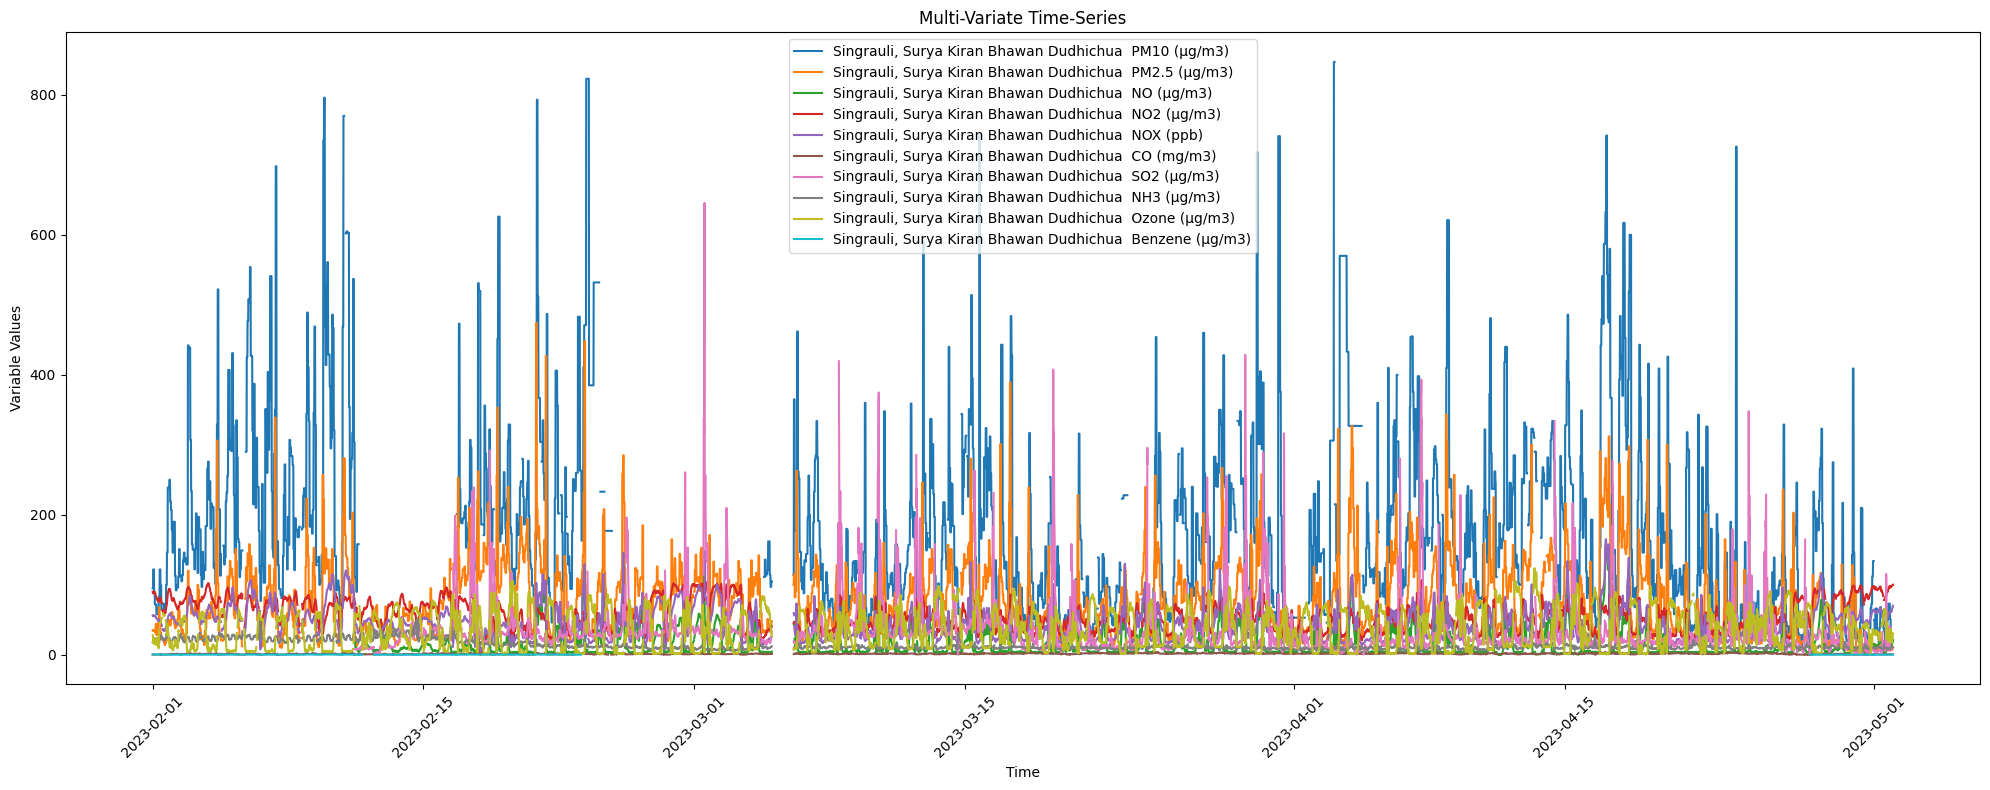

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Import data from CSV
df = pd.read_csv('/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')

# Handle missing values
df.replace('NA', pd.NA, inplace=True)

# Exclude rows where "From" value is "Min"
df = df[df['From'] != 'Min']

# Delete the last 3 rows
df = df.iloc[:-3]

# Convert date or time columns to datetime format
df['From'] = pd.to_datetime(df['From'])
df['To (Interval: 15M)'] = pd.to_datetime(df['To (Interval: 15M)'])

# Plotting the time-series data
plt.figure(figsize=(20, 8))

# Plot each variable
for column in df.columns[3:]:
    plt.plot(df['From'], df[column], label=column)

# Set plot title and labels
plt.title('Multi-Variate Time-Series')
plt.xlabel('Time')
plt.ylabel('Variable Values')

# Show a legend for the variables
plt.legend()

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
# Display the plot
plt.show()


As there are multiple variable and I  have plotted them all in single plot so I implemented different line styles or colors to differentiate between the lines.

CHECKING FOR MISSING VALUES

In [ ]:
import pandas as pd

# Read the data from a CSV file
# Read the dataset
data = pd.read_csv('/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')
data = data.iloc[:-3]

# Clean column names
data.columns = data.columns.str.replace('[^a-zA-Z0-9]', '')

# Convert date columns to datetime format
data['From'] = pd.to_datetime(data['From'])
data['ToInterval15M'] = pd.to_datetime(data['ToInterval15M'])



# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


                                                   0
From                                               0
ToInterval15M                                      0
SingrauliSuryaKiranBhawanDudhichuaPM10gm3       1681
SingrauliSuryaKiranBhawanDudhichuaPM25gm3        226
SingrauliSuryaKiranBhawanDudhichuaNOgm3         1369
SingrauliSuryaKiranBhawanDudhichuaNO2gm3         416
SingrauliSuryaKiranBhawanDudhichuaNOXppb         415
SingrauliSuryaKiranBhawanDudhichuaCOmgm3         496
SingrauliSuryaKiranBhawanDudhichuaSO2gm3        1451
SingrauliSuryaKiranBhawanDudhichuaNH3gm3         326
SingrauliSuryaKiranBhawanDudhichuaOzonegm3       453
SingrauliSuryaKiranBhawanDudhichuaBenzenegm3    6195
dtype: int64


<ipython-input-23-9b2f7fdde57a>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[^a-zA-Z0-9]', '')


As we can see that dataset has NA values in data which can also be seen in the plot. We will have to implement techniques to tackle it.

**Replacing NA values with 0 is a valid strategy in certain scenarios, but it depends on the nature of your data and the analysis you are performing. Here are a few considerations:**

**Impact on data analysis:** Replacing NA values with 0 may introduce bias or distort the patterns in the data, especially if the missing values have a specific meaning or are related to the variable's behavior. It's important to carefully consider the implications of replacing missing values with 0 and how it might affect your analysis results.

**Type of missing data:** Not all missing data is the same. There are different types of missing data, such as missing completely at random (MCAR), missing at random (MAR), and missing not at random (MNAR). The type of missing data can influence the appropriateness of replacing missing values with 0.

**Data context:** The decision to replace missing values with 0 should also consider the specific context and domain of your data. For example, if the missing values represent measurements that were not taken or data points that are genuinely zero, then replacing NA with 0 might be reasonable. However, if the missing values represent unknown or unrecorded data, replacing them with 0 could be misleading.

**Impact on downstream analysis:** Replacing missing values with 0 can affect various analyses, such as calculating averages, correlations, or performing time series forecasting. It's important to understand how the presence of 0 values may impact the interpretation of your results.



Yes! we can establish **ARMA/ARIMA process** for the
dataset and it will be **Per-Column**

<ipython-input-13-a2ed9e978fd9>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')


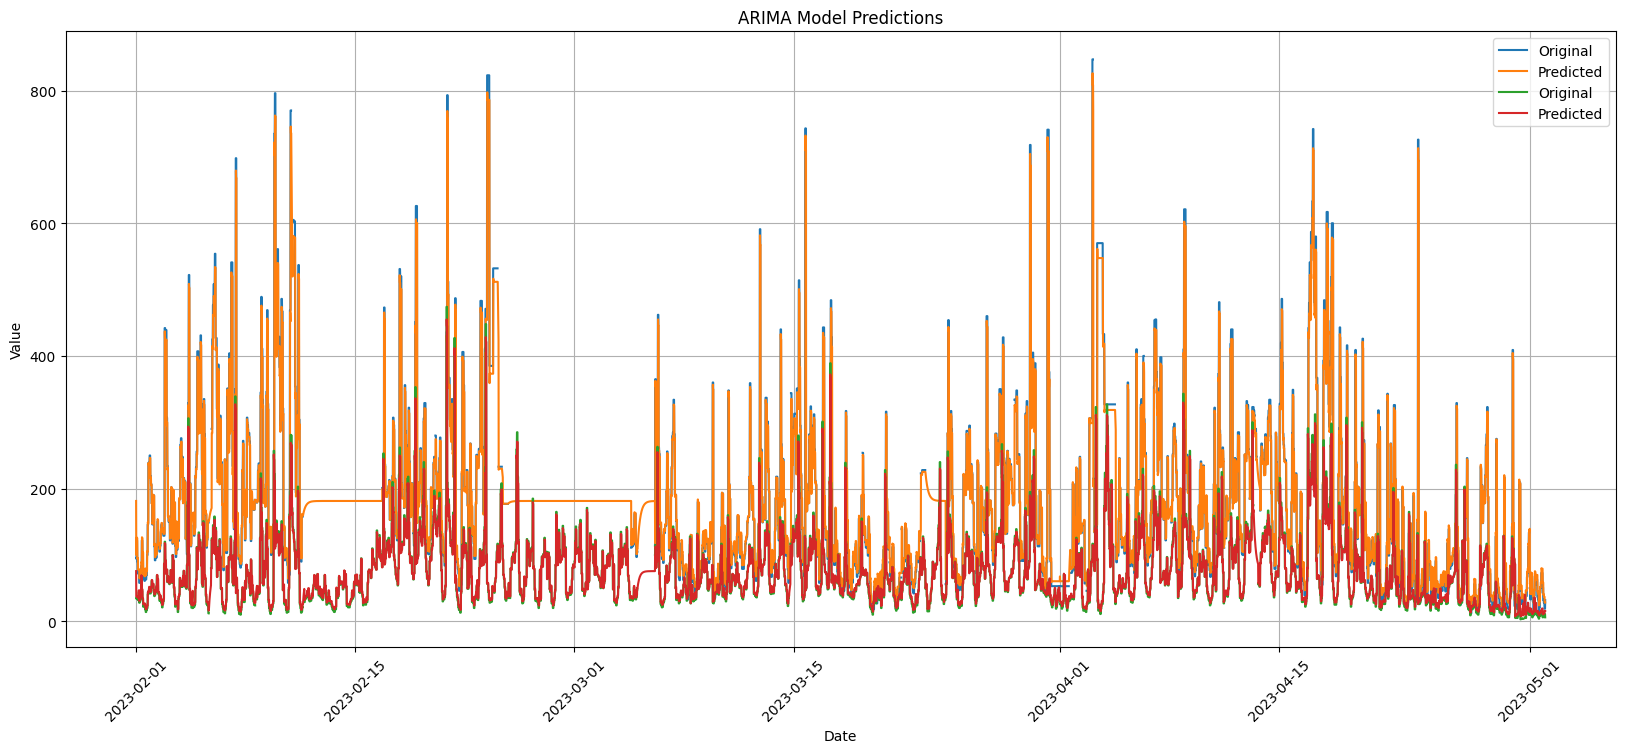

In [ ]:

from statsmodels.tsa.arima.model import ARIMA

# Read the dataset
df = pd.read_csv('/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')
df = df.iloc[:-3]

# Clean column names
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')

# Convert date columns to datetime format
df['From'] = pd.to_datetime(df['From'])
df['ToInterval15M'] = pd.to_datetime(df['ToInterval15M'])


# Select the columns for analysis
columns_to_analyze = ['SingrauliSuryaKiranBhawanDudhichuaPM10gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaPM25gm3'
                      ]



# Set the figure size
plt.figure(figsize=(20, 8))

# Iterate over the columns
for column in columns_to_analyze:
    # Fit the ARIMA model
    model = ARIMA(df[column], order=(1, 0, 1))
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=0, end=len(df)-1)

    # Plot the original data and predictions
    plt.plot(df['ToInterval15M'], df[column], label='Original')
    plt.plot(df['ToInterval15M'], predictions, label='Predicted')

# Set the plot labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


this code implements ARIMA for first two columns and plot the orignial and the predicted plots. BLUE- PM10 original GREEN- PM2.5 orignial followed by their predicted graph

Regarding interpolation, it can be used to fill in missing values or smooth out irregularities in the time series data. Interpolation methods like linear interpolation, spline interpolation, or polynomial interpolation can help estimate the missing values based on the surrounding data points. However, it's important to note that interpolation is not directly related to ARMA/ARIMA modeling, which focuses on time series forecasting and modeling the temporal dependencies of the data. Interpolation can be used as a preprocessing step before applying ARMA/ARIMA modeling or as a separate technique to handle missing data.

NOW we tried to implement **interpolation** to fill values.

<ipython-input-2-8532b000dfe3>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')


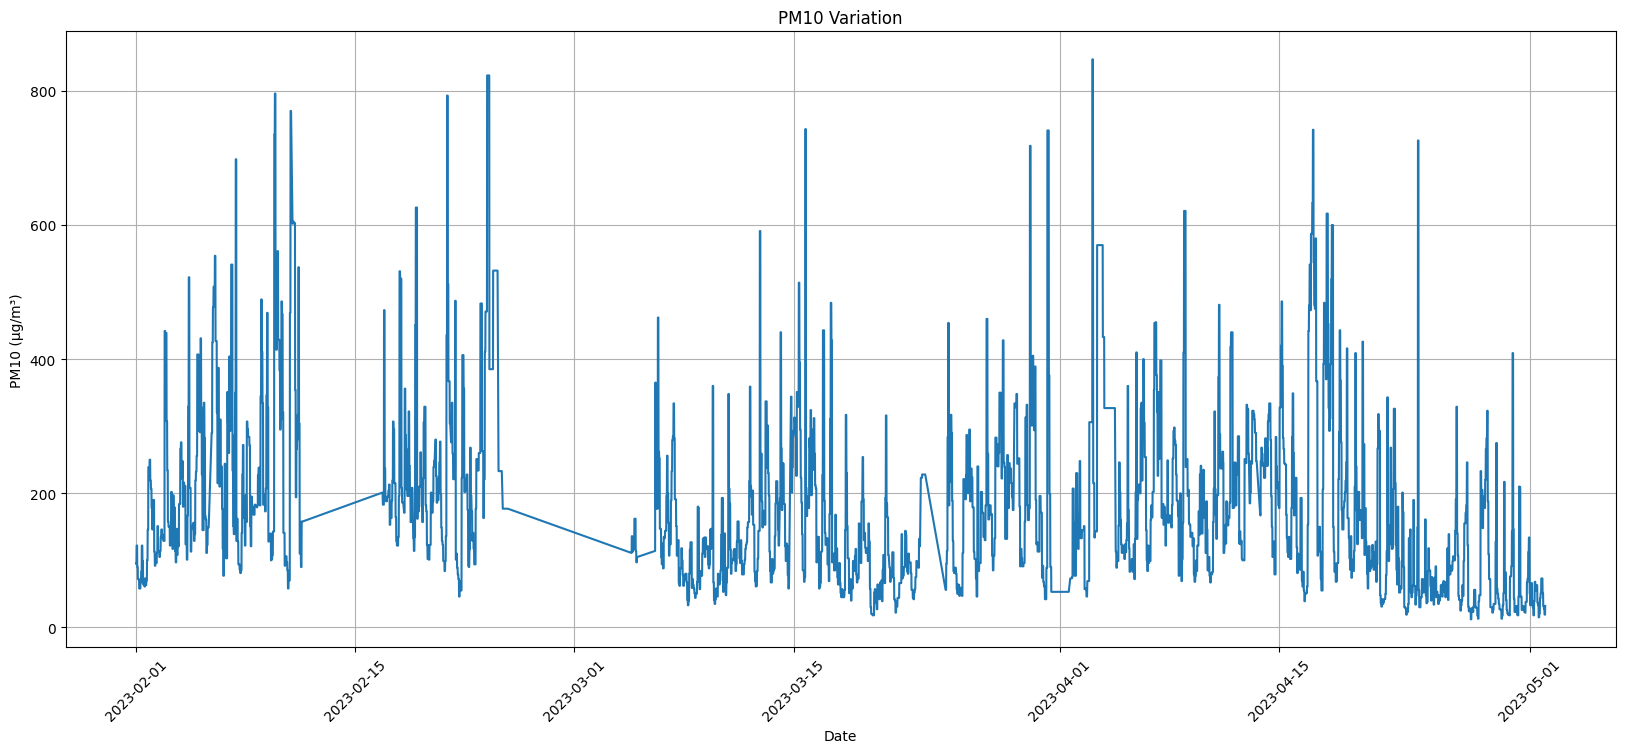

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Read the dataset
df = pd.read_csv('/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')
df = df.iloc[:-3]

# Clean column names
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')

# Convert date columns to datetime format
df['From'] = pd.to_datetime(df['From'])
df['ToInterval15M'] = pd.to_datetime(df['ToInterval15M'])

# Interpolate missing values for specific columns
columns_to_interpolate = ['SingrauliSuryaKiranBhawanDudhichuaPM10gm3',
                          'SingrauliSuryaKiranBhawanDudhichuaPM25gm3',
                          'SingrauliSuryaKiranBhawanDudhichuaNOgm3',
                          'SingrauliSuryaKiranBhawanDudhichuaNO2gm3',
                          'SingrauliSuryaKiranBhawanDudhichuaNOXppb',
                          'SingrauliSuryaKiranBhawanDudhichuaCOmgm3',
                          'SingrauliSuryaKiranBhawanDudhichuaSO2gm3',
                          'SingrauliSuryaKiranBhawanDudhichuaNH3gm3',
                          'SingrauliSuryaKiranBhawanDudhichuaOzonegm3',
                          'SingrauliSuryaKiranBhawanDudhichuaBenzenegm3']

df[columns_to_interpolate] = df[columns_to_interpolate].interpolate(method='linear')

# Select the column for analysis
pm10_column = 'SingrauliSuryaKiranBhawanDudhichuaPM10gm3'

# Plot the data
plt.figure(figsize=(20, 8))
plt.plot(df['ToInterval15M'], df[pm10_column])
plt.xlabel('Date')
plt.ylabel('PM10 (µg/m³)')
plt.title('PM10 Variation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()







This is a plot of PM10 in which missing values are filled using **Linear Interpolation**

<ipython-input-3-2277297f5945>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')


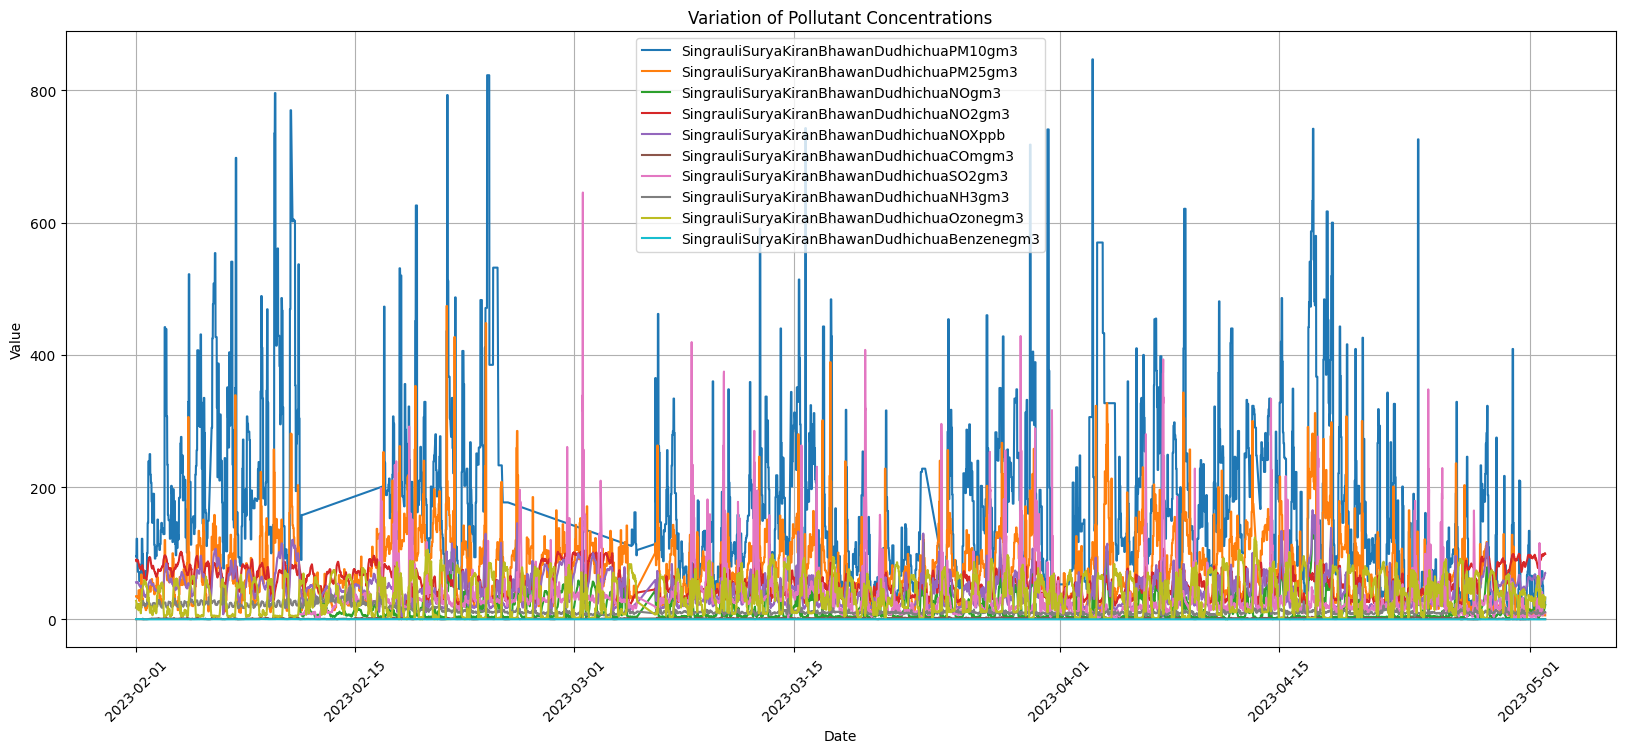

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')
df = df.iloc[:-3]

# Clean column names
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')

# Convert date columns to datetime format
df['From'] = pd.to_datetime(df['From'])
df['ToInterval15M'] = pd.to_datetime(df['ToInterval15M'])



# Select the column for analysis
columns_for_analysis = ['SingrauliSuryaKiranBhawanDudhichuaPM10gm3',
                        'SingrauliSuryaKiranBhawanDudhichuaPM25gm3',
                        'SingrauliSuryaKiranBhawanDudhichuaNOgm3',
                        'SingrauliSuryaKiranBhawanDudhichuaNO2gm3',
                        'SingrauliSuryaKiranBhawanDudhichuaNOXppb',
                        'SingrauliSuryaKiranBhawanDudhichuaCOmgm3',
                        'SingrauliSuryaKiranBhawanDudhichuaSO2gm3',
                        'SingrauliSuryaKiranBhawanDudhichuaNH3gm3',
                        'SingrauliSuryaKiranBhawanDudhichuaOzonegm3',
                        'SingrauliSuryaKiranBhawanDudhichuaBenzenegm3']

df[columns_for_analysis] = df[columns_for_analysis].interpolate(method='linear')

# Plot all columns together
plt.figure(figsize=(20, 8))
for column in columns_for_analysis:
    plt.plot(df['ToInterval15M'], df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Variation of Pollutant Concentrations')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


THIS is the plot in which is used **linear interpolation** in all the pollutants to fill missing values and then plotted its time series.

<ipython-input-4-b99f48d9db12>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')


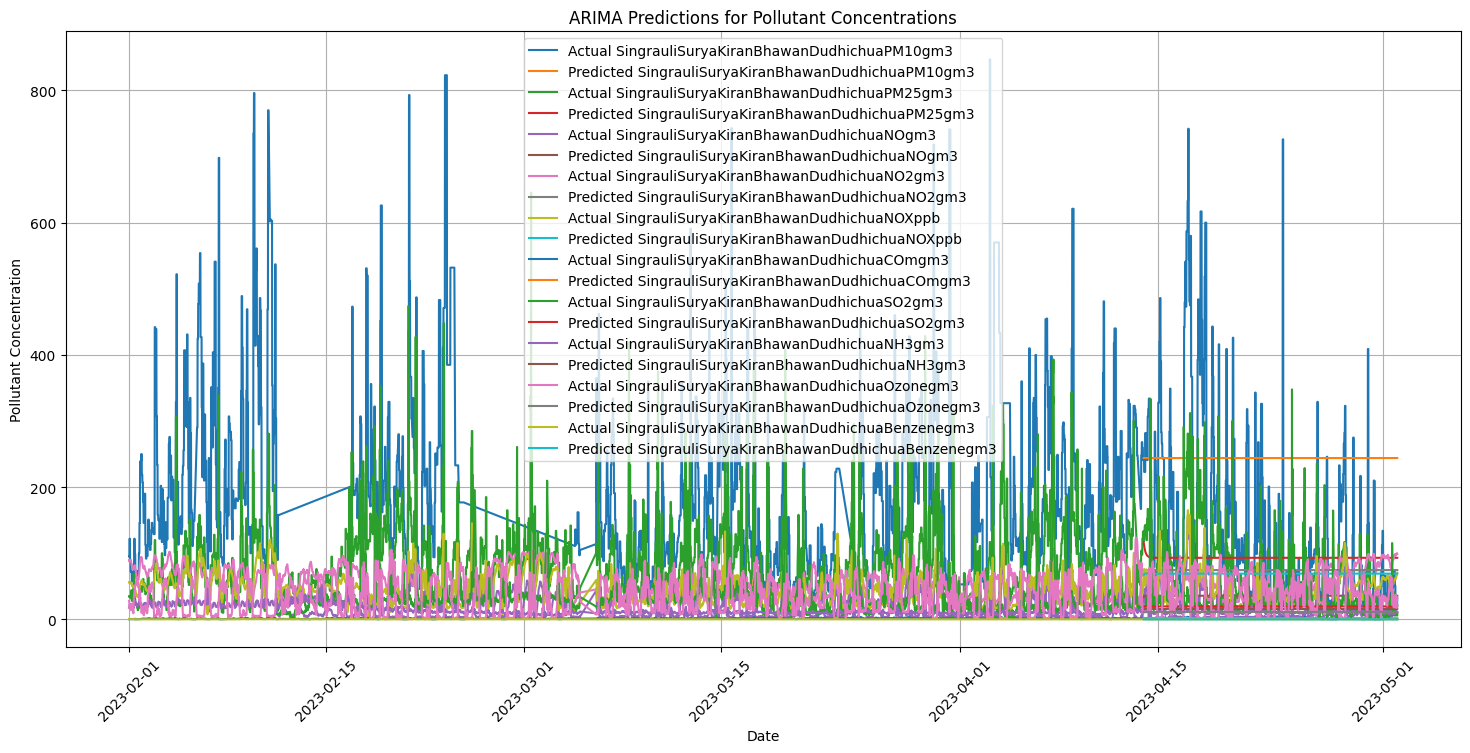

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Read the dataset
df = pd.read_csv('/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')
df = df.iloc[:-3]

# Clean column names
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')

# Convert date columns to datetime format
df['From'] = pd.to_datetime(df['From'])
df['ToInterval15M'] = pd.to_datetime(df['ToInterval15M'])

# Select the columns for analysis
columns_to_analyze = ['SingrauliSuryaKiranBhawanDudhichuaPM10gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaPM25gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNOgm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNO2gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNOXppb',
                      'SingrauliSuryaKiranBhawanDudhichuaCOmgm3',
                      'SingrauliSuryaKiranBhawanDudhichuaSO2gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNH3gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaOzonegm3',
                      'SingrauliSuryaKiranBhawanDudhichuaBenzenegm3']

# Interpolate missing values for all columns
df[columns_to_analyze] = df[columns_to_analyze].interpolate(method='linear')

# Define ARIMA order parameters for each column
arima_orders = {
    'SingrauliSuryaKiranBhawanDudhichuaPM10gm3': (1, 1, 1),
    'SingrauliSuryaKiranBhawanDudhichuaPM25gm3': (1, 1, 1),
    'SingrauliSuryaKiranBhawanDudhichuaNOgm3': (1, 1, 1),
    'SingrauliSuryaKiranBhawanDudhichuaNO2gm3': (1, 1, 1),
    'SingrauliSuryaKiranBhawanDudhichuaNOXppb': (1, 1, 1),
    'SingrauliSuryaKiranBhawanDudhichuaCOmgm3': (1, 1, 1),
    'SingrauliSuryaKiranBhawanDudhichuaSO2gm3': (1, 1, 1),
    'SingrauliSuryaKiranBhawanDudhichuaNH3gm3': (1, 1, 1),
    'SingrauliSuryaKiranBhawanDudhichuaOzonegm3': (1, 1, 1),
    'SingrauliSuryaKiranBhawanDudhichuaBenzenegm3': (1, 1, 1)
}

# Plot the pollutant concentrations and predicted values
plt.figure(figsize=(18, 8))
for column in columns_to_analyze:
    # Select the column data
    data = df[column]

    # Split the data into training and testing sets
    train_size = int(len(data) * 0.8)
    train_data, test_data = data[:train_size], data[train_size:]

    # Fit the ARIMA model
    arima = ARIMA(train_data, order=arima_orders[column])
    arima_model = arima.fit()

    # Predict the values for the testing set
    predicted_values = arima_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    # Plot the actual values
    plt.plot(df['ToInterval15M'], data, label=f'Actual {column}')

    # Plot the predicted values
    plt.plot(df['ToInterval15M'][train_size:], predicted_values, label=f'Predicted {column}')

plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('ARIMA Predictions for Pollutant Concentrations')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


This code uses arima/arma model to handle missing values and plots both the orignial series and the predicted series by applying the model.

<ipython-input-6-51f7c6f21d0c>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')


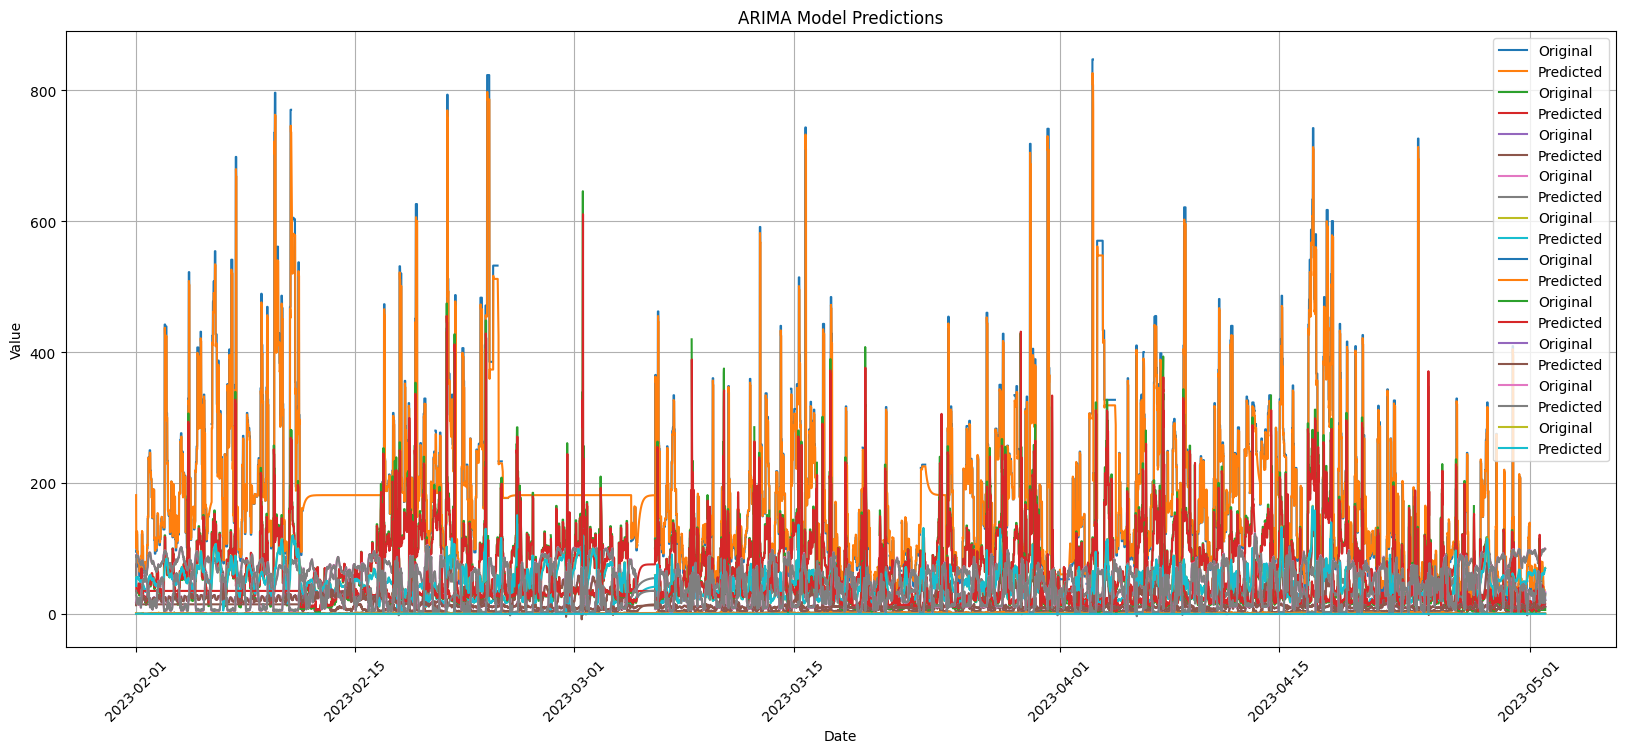

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Read the dataset
df = pd.read_csv('/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')
df = df.iloc[:-3]

# Clean column names
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')

# Convert date columns to datetime format
df['From'] = pd.to_datetime(df['From'])
df['ToInterval15M'] = pd.to_datetime(df['ToInterval15M'])


# Select the columns for analysis
columns_to_analyze = ['SingrauliSuryaKiranBhawanDudhichuaPM10gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaPM25gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNOgm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNO2gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNOXppb',
                      'SingrauliSuryaKiranBhawanDudhichuaCOmgm3',
                      'SingrauliSuryaKiranBhawanDudhichuaSO2gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNH3gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaOzonegm3',
                      'SingrauliSuryaKiranBhawanDudhichuaBenzenegm3']



# Set the figure size
plt.figure(figsize=(20, 8))

# Iterate over the columns
for column in columns_to_analyze:
    # Fit the ARIMA model
    model = ARIMA(df[column], order=(1, 0, 1))
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=0, end=len(df)-1)
    # Plot the original data and predictions
    plt.plot(df['ToInterval15M'], df[column], label='Original')
    plt.plot(df['ToInterval15M'], predictions, label='Predicted')



# Set the plot labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


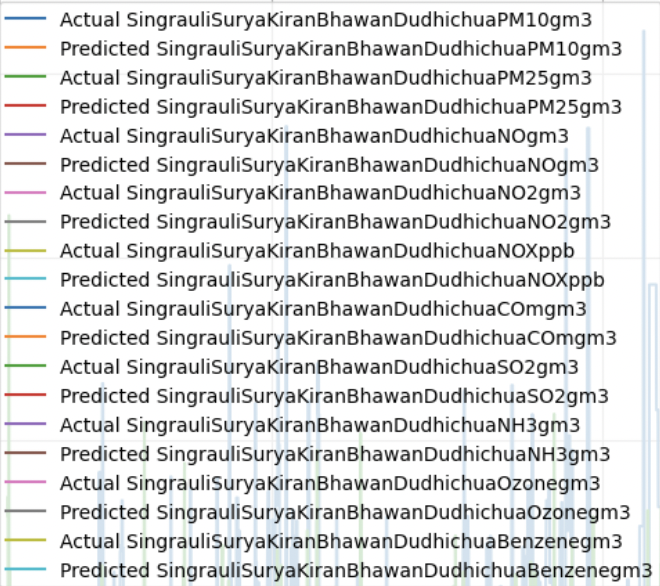

<ipython-input-10-ad6253dd67d1>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')


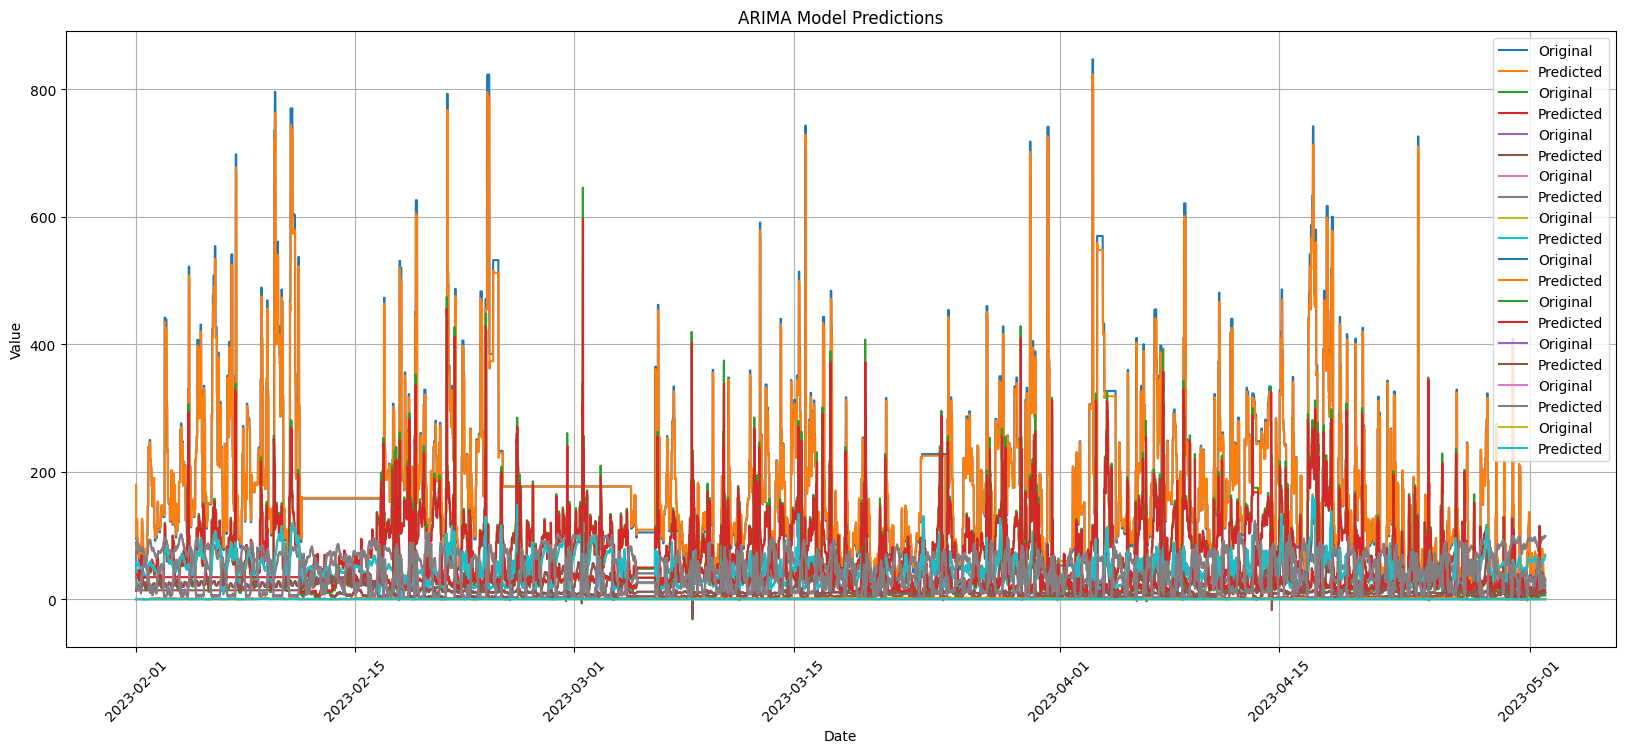

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Read the dataset
df = pd.read_csv('/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')
df = df.iloc[:-3]

# Clean column names
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')

# Convert date columns to datetime format
df['From'] = pd.to_datetime(df['From'])
df['ToInterval15M'] = pd.to_datetime(df['ToInterval15M'])

# Select the columns for analysis
columns_to_analyze = ['SingrauliSuryaKiranBhawanDudhichuaPM10gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaPM25gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNOgm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNO2gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNOXppb',
                      'SingrauliSuryaKiranBhawanDudhichuaCOmgm3',
                      'SingrauliSuryaKiranBhawanDudhichuaSO2gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNH3gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaOzonegm3',
                      'SingrauliSuryaKiranBhawanDudhichuaBenzenegm3']

# Set the figure size
plt.figure(figsize=(20, 8))

# Iterate over the columns
for column in columns_to_analyze:
    # Fill missing values with NaN
    df[column] = df[column].replace(0, np.nan)

    # Fill missing values using forward fill
    df[column].fillna(method='ffill', inplace=True)

    # Fit the ARIMA model
    model = ARIMA(df[column], order=(1, 0, 1))
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=0, end=len(df)-1)

    # Plot the original data and predictions
    plt.plot(df['ToInterval15M'], df[column], label='Original')
    plt.plot(df['ToInterval15M'], predictions, label='Predicted')

# Set the plot labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Save the filled dataframe to a new CSV file
df.to_csv('/content/Filled_Data.csv', index=False)


<ipython-input-6-10f7fb072e06>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')


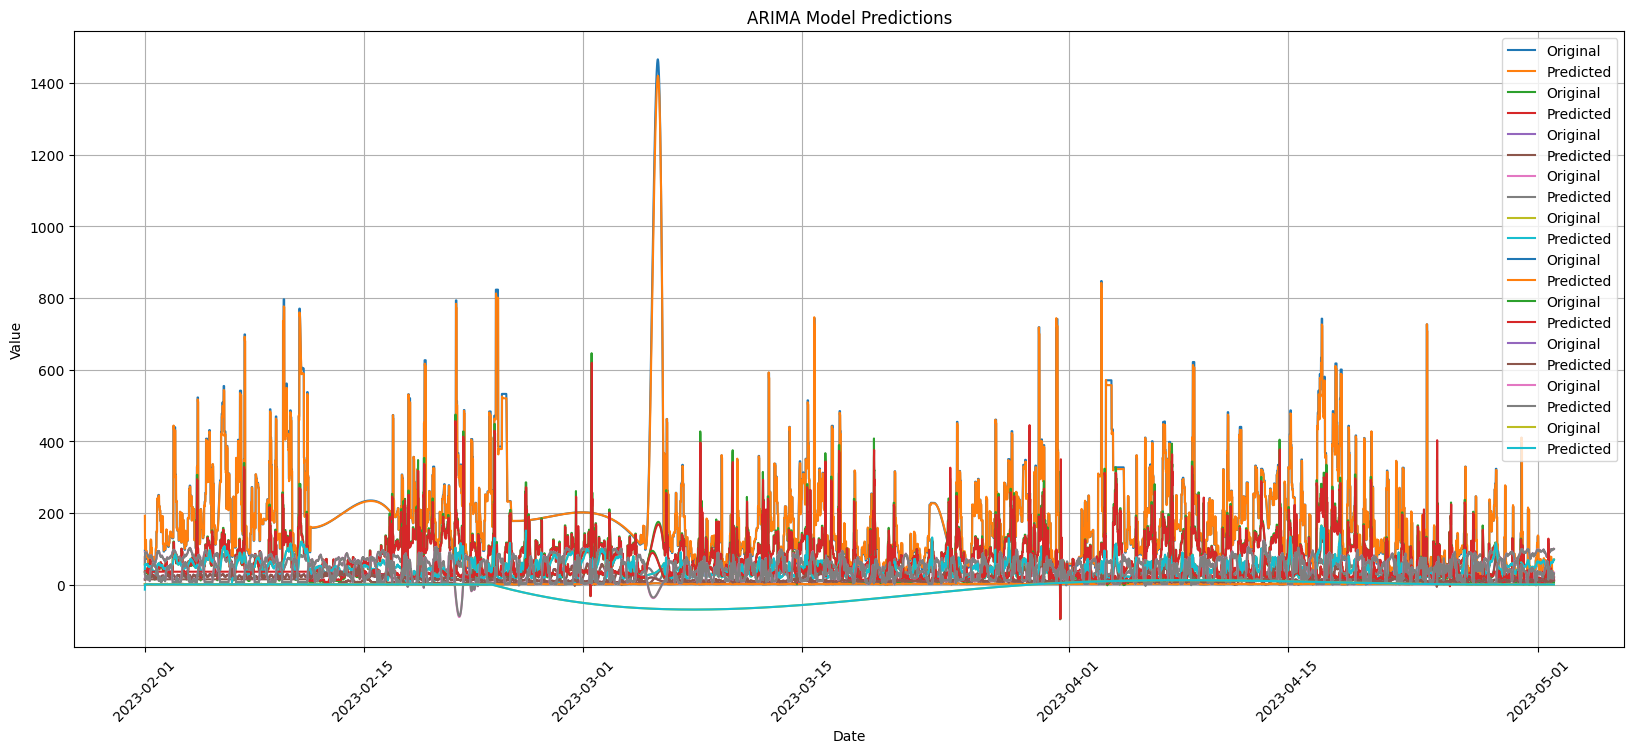

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Read the dataset
df = pd.read_csv('/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')
df = df.iloc[:-3]

# Clean column names
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')

# Convert date columns to datetime format
df['From'] = pd.to_datetime(df['From'])
df['ToInterval15M'] = pd.to_datetime(df['ToInterval15M'])


# Select the columns for analysis
columns_to_analyze = ['SingrauliSuryaKiranBhawanDudhichuaPM10gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaPM25gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNOgm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNO2gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNOXppb',
                      'SingrauliSuryaKiranBhawanDudhichuaCOmgm3',
                      'SingrauliSuryaKiranBhawanDudhichuaSO2gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNH3gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaOzonegm3',
                      'SingrauliSuryaKiranBhawanDudhichuaBenzenegm3']

                      # Interpolate missing values for all columns
df[columns_to_analyze] = df[columns_to_analyze].interpolate(method='cubic')

# Set the figure size
plt.figure(figsize=(20, 8))

# Iterate over the columns
for column in columns_to_analyze:
    # Fit the ARIMA model
    model = ARIMA(df[column], order=(1, 0, 1))
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=0, end=len(df)-1)

    # Plot the original data and predictions
    plt.plot(df['ToInterval15M'], df[column], label='Original')
    plt.plot(df['ToInterval15M'], predictions, label='Predicted')

# Set the plot labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

applied **cubic interpolation**

<ipython-input-3-c2fade66c030>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')


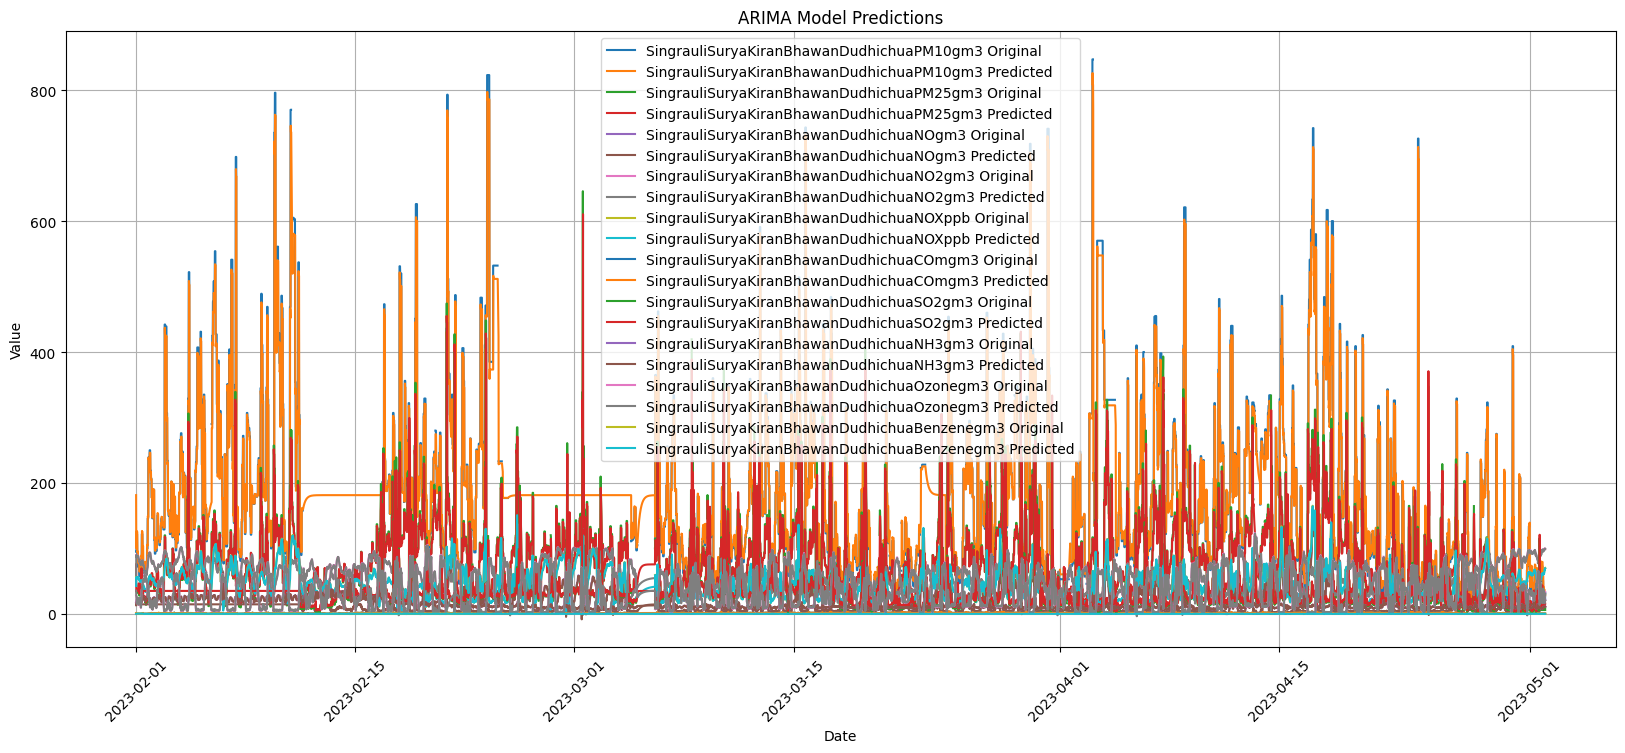

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from scipy.interpolate import make_interp_spline

# Read the dataset
df = pd.read_csv('/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')
df = df.iloc[:-3]

# Clean column names
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')

# Convert date columns to datetime format
df['From'] = pd.to_datetime(df['From'])
df['ToInterval15M'] = pd.to_datetime(df['ToInterval15M'])

# Select the columns for analysis
columns_to_analyze = ['SingrauliSuryaKiranBhawanDudhichuaPM10gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaPM25gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNOgm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNO2gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNOXppb',
                      'SingrauliSuryaKiranBhawanDudhichuaCOmgm3',
                      'SingrauliSuryaKiranBhawanDudhichuaSO2gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaNH3gm3',
                      'SingrauliSuryaKiranBhawanDudhichuaOzonegm3',
                      'SingrauliSuryaKiranBhawanDudhichuaBenzenegm3']

# Set the figure size
plt.figure(figsize=(20, 8))

# Iterate over the columns
for column in columns_to_analyze:
    # Fit the ARIMA model
    model = ARIMA(df[column], order=(1, 0, 1))
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=0, end=len(df)-1)

    # Interpolate missing values for the current column using spline interpolation
    data_column = df[column]
    x = np.arange(len(data_column))
    mask = ~pd.isnull(data_column)
    spline = make_interp_spline(x[mask], data_column[mask])
    interpolated_values = spline(np.linspace(x[0], x[-1], len(df)))
 # Plot the original data for the current column
    plt.plot(df['ToInterval15M'], df[column], label=f'{column} Original')

    # Plot the predictions for the current column
    plt.plot(df['ToInterval15M'], predictions, label=f'{column} Predicted')
# Set the plot labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Applied **Spline interpolation**

A particular method of analysing a set of air pollution data points gathered over a period of
time is called a ‘time series analysis.’ Instead of just capturing the data points intermittently or
arbitrarily, time series analyzers record the data points at regular intervals over a predetermined
length of time. Blasting time in coal India is 13:45 pm to 14:45 pm major effect on air pollution.


<ipython-input-11-c471fd357feb>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')


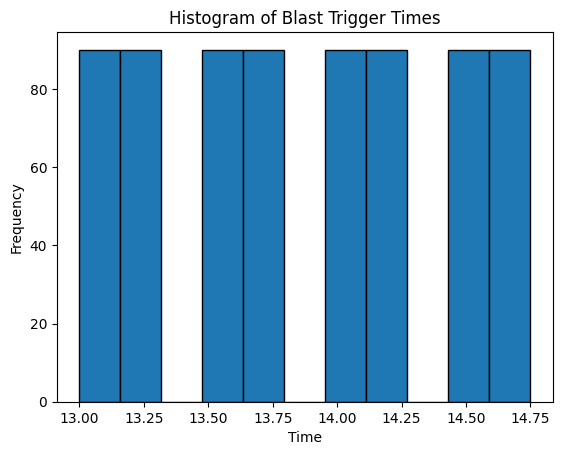

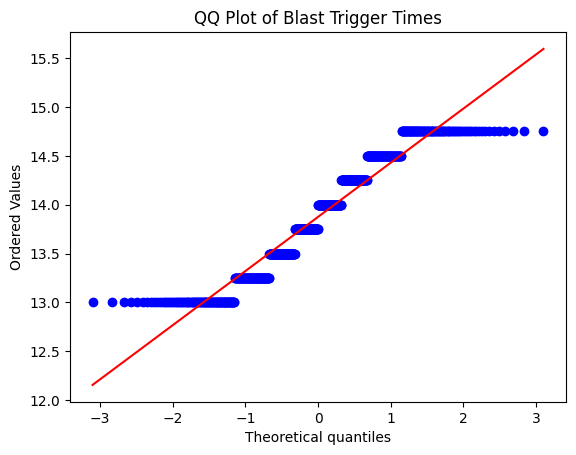

Probability of a blast happening during 14:15 to 14:30: 0.25


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Read the dataset
df = pd.read_csv('/content/Filled_Data.csv')
df = df.iloc[:-3]

# Clean column names
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')

# Convert date columns to datetime format
df['From'] = pd.to_datetime(df['From'])
df['ToInterval15M'] = pd.to_datetime(df['ToInterval15M'])


# Fill missing values using ARIMA model
def fill_missing_values(column):
    model = ARIMA(column, order=(1, 0, 0))
    model_fit = model.fit()
    column_filled = column.fillna(model_fit.predict(start=0, end=len(column)-1))
    return column_filled

# Fill missing values in each column using ARIMA
columns_to_fill = [
    'SingrauliSuryaKiranBhawanDudhichuaPM10gm3',
    'SingrauliSuryaKiranBhawanDudhichuaPM25gm3',
    'SingrauliSuryaKiranBhawanDudhichuaNOgm3',
    'SingrauliSuryaKiranBhawanDudhichuaNO2gm3',
    'SingrauliSuryaKiranBhawanDudhichuaNOXppb',
    'SingrauliSuryaKiranBhawanDudhichuaCOmgm3',
    'SingrauliSuryaKiranBhawanDudhichuaSO2gm3',
    'SingrauliSuryaKiranBhawanDudhichuaNH3gm3',
    'SingrauliSuryaKiranBhawanDudhichuaOzonegm3',
    'SingrauliSuryaKiranBhawanDudhichuaBenzenegm3'
]

for column in columns_to_fill:
    df[column] = fill_missing_values(df[column])

# Step 3: Create a weighted combination of air polluting factors
weights = {
                      'SingrauliSuryaKiranBhawanDudhichuaPM10gm3': 0.3,
                      'SingrauliSuryaKiranBhawanDudhichuaPM25gm3' : 0.2,
                      'SingrauliSuryaKiranBhawanDudhichuaNOgm3' : 0.1,
                      'SingrauliSuryaKiranBhawanDudhichuaNO2gm3': 0.1,
                      'SingrauliSuryaKiranBhawanDudhichuaNOXppb': 0.1,
                      'SingrauliSuryaKiranBhawanDudhichuaCOmgm3': 0.15,
                      'SingrauliSuryaKiranBhawanDudhichuaSO2gm3': 0.05,
                      'SingrauliSuryaKiranBhawanDudhichuaNH3gm3': 0.1,
                      'SingrauliSuryaKiranBhawanDudhichuaOzonegm3': 0.01,
                      'SingrauliSuryaKiranBhawanDudhichuaBenzenegm3': 0.5

}

df['Combined_Pollution'] = sum(df[fac] * weights[fac] for fac in weights)

# Step 4: Extract blasting time and plot histogram
blast_trigger_times = df[(df['From'].dt.hour >= 13) & (df['From'].dt.hour <= 14)]['From'].dt.time
blast_trigger_times_numeric = blast_trigger_times.apply(lambda x: x.hour + x.minute / 60)  # Convert to numeric format
plt.hist(blast_trigger_times_numeric, bins='auto', edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Blast Trigger Times')
plt.show()


# Step 5: Analyze distribution using QQ plot
blast_trigger_times_numeric = blast_trigger_times.apply(lambda x: x.hour + x.minute / 60)  # Convert to numeric format
stats.probplot(blast_trigger_times_numeric, dist='norm', plot=plt)
plt.title('QQ Plot of Blast Trigger Times')
plt.show()


# Step 6: Calculate probability of blast happening during 14:15 to 14:30
blast_probability = ((blast_trigger_times >= pd.to_datetime('14:15').time()) &
                     (blast_trigger_times <= pd.to_datetime('14:30').time())).mean()

print('Probability of a blast happening during 14:15 to 14:30:', blast_probability)


to save a new file with linear interpolated data

In [8]:
import pandas as pd

def fill_missing_values_linear_interpolation(file_path, output_file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Iterate over columns starting from the 4th column
    for column_name in df.columns[3:]:
        # Convert "NA" to NaN
        df[column_name] = df[column_name].replace("NA", float("nan"))

        # Perform linear interpolation
        df[column_name] = df[column_name].interpolate(method='linear')

    # Save the updated DataFrame to a new CSV file
    df.to_csv(output_file_path, index=False)

# Usage example
input_file_path = '/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv'
output_file_path = '/content/linear_filled.csv'

fill_missing_values_linear_interpolation(input_file_path, output_file_path)


# **Problem Statement:**

The objective of this analysis is to examine the air quality data collected from Singrauli, Surya Kiran Bhawan Dudhichua, and gain insights into the levels of various pollutants present in the air. The dataset provides information on PM10, PM2.5, NO, NO2, NOX, CO, SO2, NH3, Ozone, and Benzene concentrations at 15-minute intervals over a specific time period.

# **Key Questions to Address:**


Are there any significant fluctuations or patterns observed in the pollutant levels?
Are there any correlations between different pollutants?
Are there any periods of time when certain pollutants exceeded the permissible limits?
Are there any relationships between pollutant levels and time of day?
Are there any pollutant concentration outliers that need further investigation?

1.   What is the overall trend of each pollutant concentration during the recorded time period? plot time series
2.   Are there any correlations between different pollutants?

3.   Are there any periods of time when certain pollutants exceeded the permissible limits?

4.   Are there any relationships between pollutant levels and time of day? DO a descriptive analysis
5.   Predict the future Data of atleast 15 days

6.   Are there any pollutant concentration outliers that need further investigation?











In [23]:
import pandas as pd

# Read the data from a CSV file
# Read the dataset
data = pd.read_csv('/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')
data = data.iloc[:-3]

# Clean column names
data.columns = data.columns.str.replace('[^a-zA-Z0-9]', '')

# Convert date columns to datetime format
data['From'] = pd.to_datetime(data['From'])
data['ToInterval15M'] = pd.to_datetime(data['ToInterval15M'])



# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


                                                   0
From                                               0
ToInterval15M                                      0
SingrauliSuryaKiranBhawanDudhichuaPM10gm3       1681
SingrauliSuryaKiranBhawanDudhichuaPM25gm3        226
SingrauliSuryaKiranBhawanDudhichuaNOgm3         1369
SingrauliSuryaKiranBhawanDudhichuaNO2gm3         416
SingrauliSuryaKiranBhawanDudhichuaNOXppb         415
SingrauliSuryaKiranBhawanDudhichuaCOmgm3         496
SingrauliSuryaKiranBhawanDudhichuaSO2gm3        1451
SingrauliSuryaKiranBhawanDudhichuaNH3gm3         326
SingrauliSuryaKiranBhawanDudhichuaOzonegm3       453
SingrauliSuryaKiranBhawanDudhichuaBenzenegm3    6195
dtype: int64


<ipython-input-23-9b2f7fdde57a>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[^a-zA-Z0-9]', '')


**Visualize time series of pollutant concentrations**

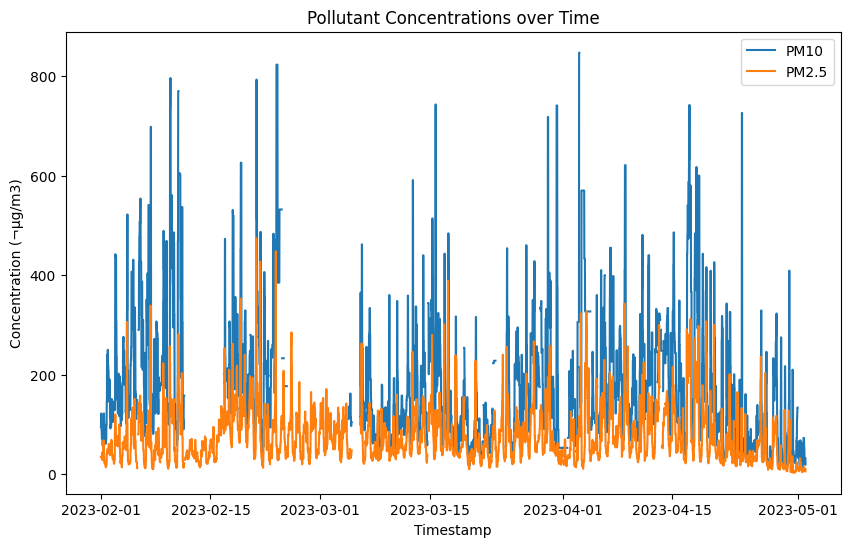

                    SingrauliSuryaKiranBhawanDudhichuaPM10gm3  \
count  8640.000000                                6959.000000   
mean   4320.500000                                 181.408679   
std    2494.297496                                 136.016142   
min       1.000000                                  12.000000   
25%    2160.750000                                  84.000000   
50%    4320.500000                                 145.000000   
75%    6480.250000                                 238.000000   
max    8640.000000                                 847.000000   

       SingrauliSuryaKiranBhawanDudhichuaPM25gm3  \
count                                8414.000000   
mean                                   75.690397   
std                                    55.245265   
min                                     3.000000   
25%                                    36.000000   
50%                                    61.000000   
75%                                   101.000000  

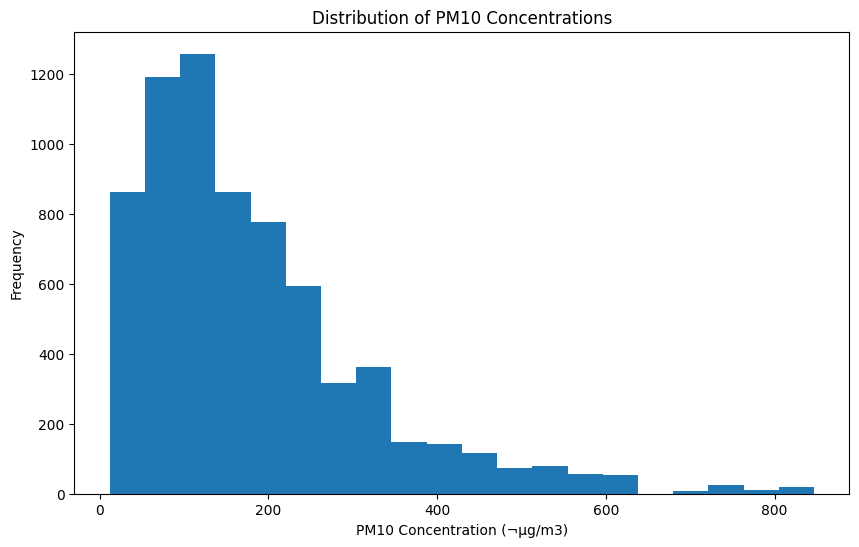

In [26]:
import matplotlib.pyplot as plt

# Visualize time series of pollutant concentrations
plt.figure(figsize=(10, 6))
plt.plot(data['From'], data['SingrauliSuryaKiranBhawanDudhichuaPM10gm3'], label='PM10')
plt.plot(data['From'], data['SingrauliSuryaKiranBhawanDudhichuaPM25gm3'], label='PM2.5')
# Repeat for other pollutants
plt.xlabel('Timestamp')
plt.ylabel('Concentration (¬µg/m3)')
plt.title('Pollutant Concentrations over Time')
plt.legend()
plt.show()

# Calculate summary statistics
summary_stats = data.describe()
print(summary_stats)

# Examine the distribution of pollutant concentrations
plt.figure(figsize=(10, 6))
plt.hist(data['SingrauliSuryaKiranBhawanDudhichuaPM10gm3'], bins=20)
plt.xlabel('PM10 Concentration (¬µg/m3)')
plt.ylabel('Frequency')
plt.title('Distribution of PM10 Concentrations')
plt.show()


# Correlation Analysis:
Correlation Matrix of Pollutant Concentrations

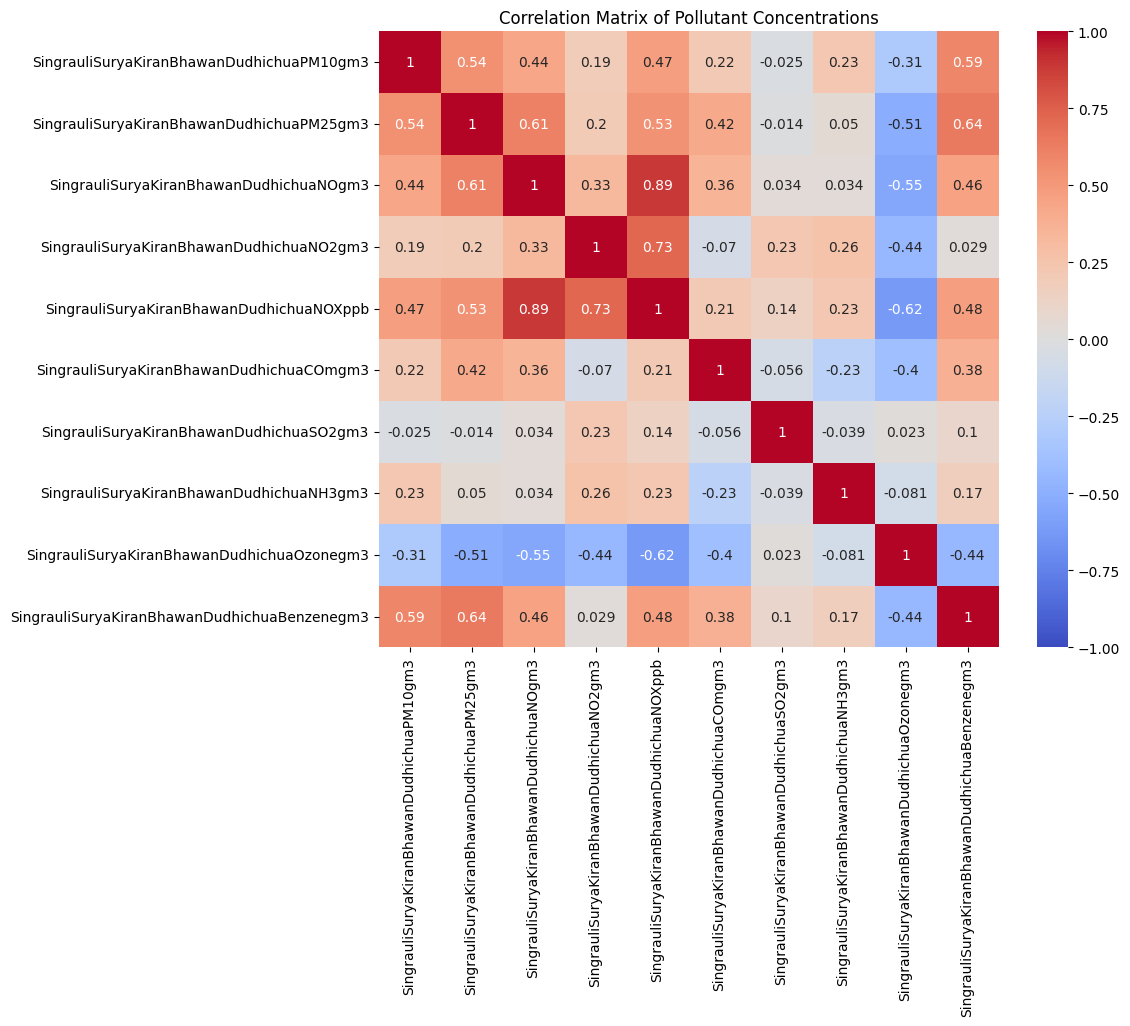

In [29]:
import seaborn as sns
# Select relevant pollutant columns for correlation analysis
pollutant_columns = ['SingrauliSuryaKiranBhawanDudhichuaPM10gm3',
    'SingrauliSuryaKiranBhawanDudhichuaPM25gm3',
    'SingrauliSuryaKiranBhawanDudhichuaNOgm3',
    'SingrauliSuryaKiranBhawanDudhichuaNO2gm3',
    'SingrauliSuryaKiranBhawanDudhichuaNOXppb',
    'SingrauliSuryaKiranBhawanDudhichuaCOmgm3',
    'SingrauliSuryaKiranBhawanDudhichuaSO2gm3',
    'SingrauliSuryaKiranBhawanDudhichuaNH3gm3',
    'SingrauliSuryaKiranBhawanDudhichuaOzonegm3',
    'SingrauliSuryaKiranBhawanDudhichuaBenzenegm3'
]
# Calculate correlation coefficients
corr_matrix = data[pollutant_columns].corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pollutant Concentrations')
plt.show()


check for threshold values for each pollutant

In [32]:
# Define threshold values for each pollutant
thresholds = {
   'SingrauliSuryaKiranBhawanDudhichuaPM25gm3':50,
    'SingrauliSuryaKiranBhawanDudhichuaNOgm3':45,
    'SingrauliSuryaKiranBhawanDudhichuaNO2gm3':20,
    # Add thresholds for other pollutants
}

# Identify exceedances for each pollutant
exceedances = {}
for pollutant, threshold in thresholds.items():
    try:
        exceedances[pollutant] = data[data[pollutant] > threshold]
    except KeyError:
        print(f"Column '{pollutant}' not found in the dataset.")

# Print the exceedances for each pollutant
for pollutant, exceedance_data in exceedances.items():
    print(f"Exceedances for {pollutant}:")
    print(exceedance_data)

# Count the number of exceedances for each pollutant
exceedance_counts = {pollutant: len(exceedance_data) for pollutant, exceedance_data in exceedances.items()}
print("\nExceedance Counts:")
print(exceedance_counts)


Exceedances for SingrauliSuryaKiranBhawanDudhichuaPM25gm3:
                          From       ToInterval15M  \
31      32 2023-02-01 07:45:00 2023-02-01 08:00:00   
32      33 2023-02-01 08:00:00 2023-02-01 08:15:00   
33      34 2023-02-01 08:15:00 2023-02-01 08:30:00   
34      35 2023-02-01 08:30:00 2023-02-01 08:45:00   
95      96 2023-02-01 23:45:00 2023-02-02 00:00:00   
...    ...                 ...                 ...   
8450  8451 2023-04-30 00:30:00 2023-04-30 00:45:00   
8451  8452 2023-04-30 00:45:00 2023-04-30 01:00:00   
8452  8453 2023-04-30 01:00:00 2023-04-30 01:15:00   
8453  8454 2023-04-30 01:15:00 2023-04-30 01:30:00   
8454  8455 2023-04-30 01:30:00 2023-04-30 01:45:00   

      SingrauliSuryaKiranBhawanDudhichuaPM10gm3  \
31                                         83.0   
32                                         83.0   
33                                         83.0   
34                                         83.0   
95                                   

<ipython-input-35-df9fc27dfa0a>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_data = data.resample('H', on='Timestamp').mean()


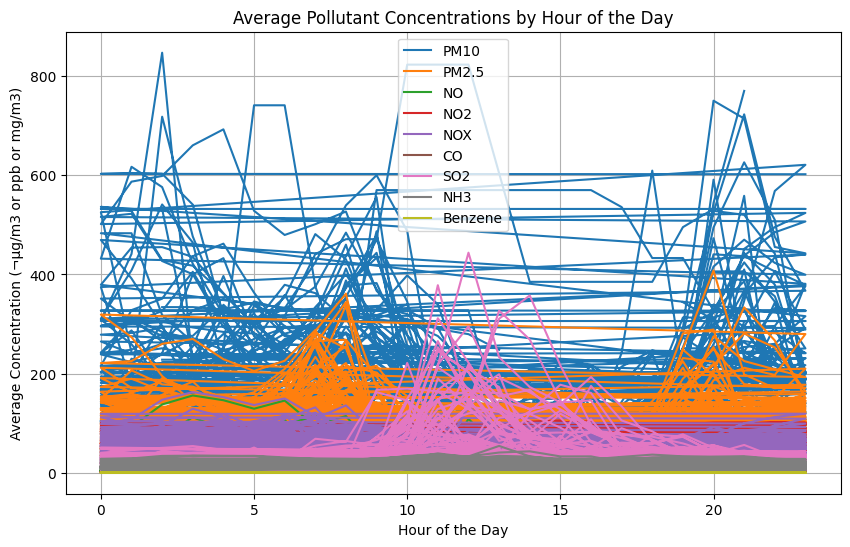

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'From' column to datetime format
data['Timestamp'] = data['From']

# Group data by hourly intervals and calculate average pollutant concentrations
hourly_data = data.resample('H', on='Timestamp').mean()


# Plot average pollutant concentrations by hour of the day
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index.hour, hourly_data['SingrauliSuryaKiranBhawanDudhichuaPM10gm3'], label='PM10')
plt.plot(hourly_data.index.hour, hourly_data['SingrauliSuryaKiranBhawanDudhichuaPM25gm3'], label='PM2.5')
plt.plot(hourly_data.index.hour, hourly_data['SingrauliSuryaKiranBhawanDudhichuaNOgm3'], label='NO')
plt.plot(hourly_data.index.hour, hourly_data['SingrauliSuryaKiranBhawanDudhichuaNO2gm3'], label='NO2')
plt.plot(hourly_data.index.hour, hourly_data['SingrauliSuryaKiranBhawanDudhichuaNOXppb'], label='NOX')
plt.plot(hourly_data.index.hour, hourly_data['SingrauliSuryaKiranBhawanDudhichuaCOmgm3'], label='CO')
plt.plot(hourly_data.index.hour, hourly_data['SingrauliSuryaKiranBhawanDudhichuaSO2gm3'], label='SO2')
plt.plot(hourly_data.index.hour, hourly_data['SingrauliSuryaKiranBhawanDudhichuaNH3gm3'], label='NH3')
plt.plot(hourly_data.index.hour, hourly_data['SingrauliSuryaKiranBhawanDudhichuaBenzenegm3'], label='Benzene')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Concentration (¬µg/m3 or ppb or mg/m3)')
plt.title('Average Pollutant Concentrations by Hour of the Day')
plt.legend()
plt.grid(True)
plt.show()


# Forecasting





I used linear interpolated dataset to predict future by training the model for 2months (5760 rows as each row denoted 15mins) and tested it on to predict 15 days and stored the new file of future predicted 15 days. I have also plotted the future prediction of 15 days with the last 15 days of dataset provided

<ipython-input-17-9686256baeb9>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[^a-zA-Z0-9]', '')
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


      SingrauliSuryaKiranBhawanDudhichuaPM10gm3  \
2880                                 129.302180   
2881                                 133.735914   
2882                                 137.933530   
2883                                 141.907604   
2884                                 145.670039   
...                                         ...   
4315                                 212.557443   
4316                                 212.557443   
4317                                 212.557443   
4318                                 212.557443   
4319                                 212.557443   

      SingrauliSuryaKiranBhawanDudhichuaPM25gm3  \
2880                                  80.868501   
2881                                  80.747686   
2882                                  80.636685   
2883                                  80.534701   
2884                                  80.441003   
...                                         ...   
4315                          

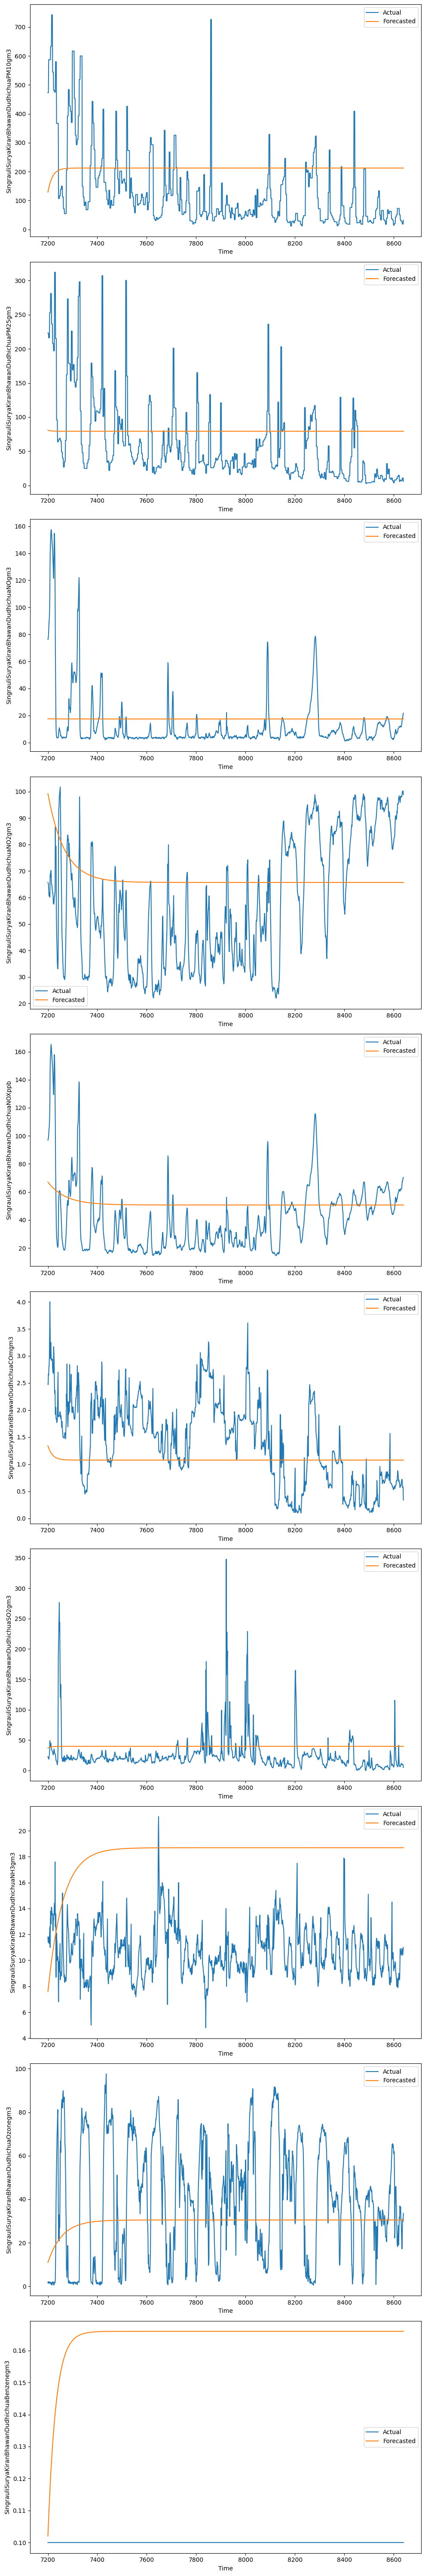

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Read the dataset
data = pd.read_csv('/content/linear_filled.csv')
data = data.iloc[:-3]
# Preprocess the dataset
# Clean column names
data.columns = data.columns.str.replace('[^a-zA-Z0-9]', '')

# Convert date columns to datetime format
data['From'] = pd.to_datetime(data['From'])
data['ToInterval15M'] = pd.to_datetime(data['ToInterval15M'])


# Fill missing values in each column using ARIMA
pollutants = [
    'SingrauliSuryaKiranBhawanDudhichuaPM10gm3',
    'SingrauliSuryaKiranBhawanDudhichuaPM25gm3',
    'SingrauliSuryaKiranBhawanDudhichuaNOgm3',
    'SingrauliSuryaKiranBhawanDudhichuaNO2gm3',
    'SingrauliSuryaKiranBhawanDudhichuaNOXppb',
    'SingrauliSuryaKiranBhawanDudhichuaCOmgm3',
    'SingrauliSuryaKiranBhawanDudhichuaSO2gm3',
    'SingrauliSuryaKiranBhawanDudhichuaNH3gm3',
    'SingrauliSuryaKiranBhawanDudhichuaOzonegm3',
    'SingrauliSuryaKiranBhawanDudhichuaBenzenegm3'
]
# Split the data into training and test sets
train_data = data.iloc[:-5760]  # Use the first 3 months of data for training
test_data = data.iloc[-1440:]  # Use the last month of data for testing

# Perform forecasting for each pollutant
forecasted_data = pd.DataFrame()
for pollutant in pollutants:
    # Build and train the ARIMA model
    model = ARIMA(train_data[pollutant], order=(1, 0, 0))  # (p, d, q) parameters for ARIMA model
    model_fit = model.fit()

    # Forecast the next month's data
    forecast = model_fit.get_forecast(steps=1440)  # Forecast for the next month (30 days x 24 hours = 720 steps)
    forecasted_values = forecast.predicted_mean

    # Store the forecasted values for the pollutant in a DataFrame
    forecasted_data[pollutant] = forecasted_values

# Print the forecasted data for the 4th month
print(forecasted_data)

fig, ax = plt.subplots(len(pollutants), figsize=(10, 6 * len(pollutants)))
for i, pollutant in enumerate(pollutants):
    ax[i].plot(test_data.index, test_data[pollutant], label='Actual')
    ax[i].plot(test_data.index, forecasted_data[pollutant], label='Forecasted')
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel(pollutant)
    ax[i].legend()

plt.tight_layout()
plt.show()

# Store the forecasted data in a new DataFrame or export it to a file if needed
forecasted_data.to_csv('forecasted_data.csv')


# DESCRIPTIVE ANALYSIS



Descriptive analysis: Identifies patterns in time series data at the time of coal India open-pit blasting effect, in coal india blasting effect time is 13:45 pm to 14:45 pm.

In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv('/content/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')
df = df.iloc[:-3]


# Convert date and time columns to datetime format
df['From'] = pd.to_datetime(df['From'], dayfirst=True)
df['To (Interval: 15M)'] = pd.to_datetime(df['To (Interval: 15M)'], dayfirst=True)

# Set the index of the DataFrame as the 'From' column
df.set_index('From', inplace=True)

# Filter the dataset to include only data during the blasting effect period
start_time = '13:45:00'
end_time = '14:45:00'
blast_period_data = df.between_time(start_time, end_time)

# Calculate measures of frequency
frequency = blast_period_data.shape[0]
print("Frequency of air pollution measurements during blasting effect period:", frequency)

# Calculate measures of central tendency
mean = blast_period_data.mean()
median = blast_period_data.median()
mode = blast_period_data.mode().iloc[0]
print("Mean pollution levels during blasting effect period:\n", mean)
print("\nMedian pollution levels during blasting effect period:\n", median)
print("\nMode of pollution levels during blasting effect period:\n", mode)

# Calculate measures of dispersion or variation
range_val = blast_period_data.max() - blast_period_data.min()
std_dev = blast_period_data.std()
variance = blast_period_data.var()
print("\nRange of pollution levels during blasting effect period:\n", range_val)
print("\nStandard deviation of pollution levels during blasting effect period:\n", std_dev)
print("\nVariance of pollution levels during blasting effect period:\n", variance)

# Calculate measures of position
percentile_25 = blast_period_data.quantile(0.25)
percentile_50 = blast_period_data.quantile(0.50)
percentile_75 = blast_period_data.quantile(0.75)
print("\n25th percentile of pollution levels during blasting effect period:\n", percentile_25)
print("\n50th percentile (median) of pollution levels during blasting effect period:\n", percentile_50)
print("\n75th percentile of pollution levels during blasting effect period:\n", percentile_75)


Frequency of air pollution measurements during blasting effect period: 450
Mean pollution levels during blasting effect period:
 #                                                           4330.000000
Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)        109.045070
Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)        34.732719
Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)            5.507595
Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)          47.611486
Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)            29.928378
Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)            1.070167
Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)          53.607634
Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)          12.756306
Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)        66.457175
Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)       0.104762
dtype: float64

Median pollution levels during blasting effect period:
 #      

<ipython-input-9-6d96b353d197>:25: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = blast_period_data.mean()
<ipython-input-9-6d96b353d197>:26: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median = blast_period_data.median()
<ipython-input-9-6d96b353d197>:35: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = blast_period_data.var()
<ipython-input-9-6d96b353d197>:41: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numer